# MNIST digit recognition

#### Josep Fortiana  2019-11-26

MNIST is a classic dataset, a standard testbed for classifying methods. In the introduction to the [Kaggle competition](https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer) we read: MNIST ("Modified National Institute of Standards and Technology") is the de facto "Hello World" dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The database has $60000$ _(train)_ and $10000$ _(test)_ $28\times28$ bitmaps of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. 

The original data can be found at:
[Yann LeCun, Corinna Cortes, Christopher J.C. Burges, _The MNIST database of handwritten digits_](http://yann.lecun.com/exdb/mnist/), in a somewhat unusual format. A straightforward way to get it in a readily usable format is to load it from the _Keras/Tensorflow_ framework. It is a rather large installation, but anyway we will need it for the Neural Networks lesson. We follow directions from [JJ Allaire (2017) _Keras for R_](https://blog.rstudio.com/2017/09/05/keras-for-r/). Alternatively, there is a `.csv` version in [Joseph Chet Redmon's web page](https://pjreddie.com/projects/mnist-in-csv/), together with a python script to convert from the original format.

Warning! It is advisable to run the following three lines of code from RStudio or, still better, from the plain R console. It installs both the core _Keras_ library as well as the _TensorFlow_ backend.

In [ ]:
#install.packages("keras",dependencies=TRUE,repos="https://cloud.r-project.org")
#library(keras)
#install_keras()

To obtain the MNIST data:

In [1]:
require(keras)
mnist <- dataset_mnist()
str(mnist)

Loading required package: keras


List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [2]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

The $x$ data is a 3-d array (images,width,height) of grayscale values. To prepare the data for training we convert the 3-d arrays into matrices by reshaping width and height into a single dimension ($28\times 28$ images are flattened into length 784 vectors). Then, we convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1:

In [3]:
# reshape
dim(x_train) <- c(nrow(x_train), 784)
dim(x_test) <- c(nrow(x_test), 784)
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

The responses vectors `y_train`and `y_test` must be cast as factors to feed them to `rpart`

In [4]:
y_train<-as.factor(y_train)
y_test<-as.factor(y_test)
n_train<-length(y_train)
n_test<-length(y_test)
str(y_train)
str(y_test)
n_train
n_test

 Factor w/ 10 levels "0","1","2","3",..: 6 1 5 2 10 3 2 4 2 5 ...
 Factor w/ 10 levels "0","1","2","3",..: 8 3 2 1 5 2 5 10 6 10 ...


[1] 60000

[1] 10000

Some random images from the MNIST database:

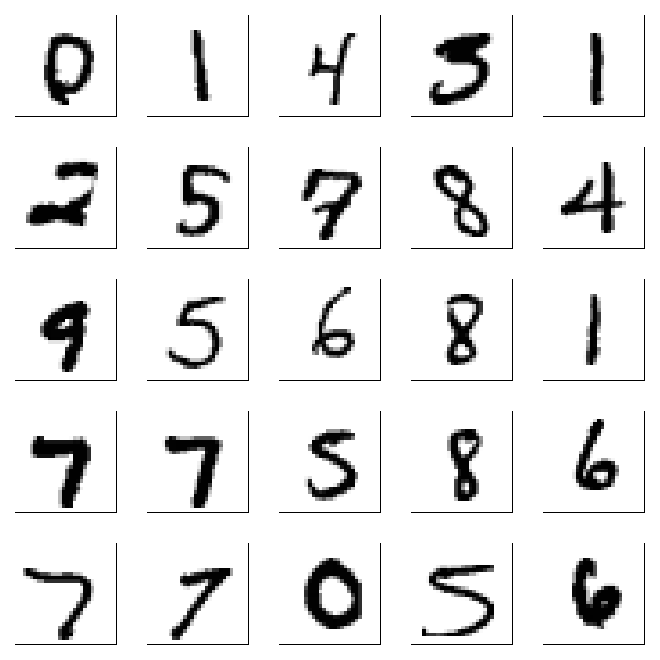

In [16]:
k<-5
plot.zip.mosaic<-function(k){
    old.par<-par(mfrow=c(k,k),mar=c(1,1,1,1))
    Indexes<-sample(n_train,k^2)
    for (i in Indexes){
        m1<-t(matrix(x_train[i,],nrow=28,ncol=28))[,28:1]
        image(-m1,col=gray((0:255)/255),xaxt="n",yaxt="n")}
    par(old.par)}
options(repr.plot.width=5.5,repr.plot.height=5.5)
plot.zip.mosaic(k)